# Sort through data to input into application

In [3]:
# Clean function with everything 
import pandas as pd
import geopandas as gpd
import os

# Import data
# base_dir = "/capstone/justice40/data"
base_dir = "~/MEDS/justice40/data-exploration/data"
pd.set_option('display.max_columns', None)

In [4]:
# 2.0 communities files (from current CEJST website)
comm_v2 = pd.read_csv(os.path.join(base_dir, "2.0-communities.csv"))
usa_v2 = pd.read_csv(os.path.join(base_dir, "usa_v2.csv"))

# Version 2.0 shapefile data
# v2_geo = gpd.read_file(os.path.join(base_dir, "2.0-shapefile-codebook", "usa", "usa.shp"))
# codebook = pd.read_csv(os.path.join(base_dir, "2.0-shapefile-codebook", "2.0-codebook.csv"))


/var/folders/ck/21jw_cxj7j984t_wcgbyrv200000gn/T/ipykernel_81477/950458054.py:2: DtypeWarning: Columns (18,29,73,75,88,134) have mixed types. Specify dtype option on import or set low_memory=False.
  comm_v2 = pd.read_csv(os.path.join(base_dir, "2.0-communities.csv"))
/var/folders/ck/21jw_cxj7j984t_wcgbyrv200000gn/T/ipykernel_81477/950458054.py:3: DtypeWarning: Columns (1,2,3,79,80,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  usa_v2 = pd.read_csv(os.path.join(base_dir, "usa_v2.csv"))


In [ ]:
# Read in tribal shapefile from data.gov
tribal = gpd.read_file(os.path.join(base_dir, "tl_2022_us_aiannh", "tl_2022_us_aiannh.shp"))
tsa = gpd.read_file(os.path.join(base_dir, "BIA_AIAN_Tribal_Statistical_Areas.geojson"))
villages = gpd.read_file(os.path.join(base_dir, "Alaska_Native_Villages.geojson"))

In [118]:
# data_dir = '/capstone/justice40/haylees-version-j40/j40-cejst-2/data/data-pipeline/data_pipeline/data'
data_dir = '~/MEDS/justice40/j40-cejst-2/data/data-pipeline/data_pipeline/data/'

tracts = pd.read_json(os.path.join(data_dir, 'score', 'search', 'tracts.json'))
high = gpd.read_file(os.path.join(data_dir, 'score', 'geojson', 'usa-high.json'))
low = gpd.read_file(os.path.join(data_dir, 'score', 'geojson', 'usa-low.json'))
shp = gpd.read_file(os.path.join(data_dir, 'score', 'shapefile', 'usa.shp'))
# counties = pd.read_csv(os.path.join(data_dir, 'score', 'csv', 'full', 'usa_counties.csv'))
# usa = pd.read_csv(os.path.join(data_dir, 'score', 'csv', 'full', 'usa.csv'))
# tile_usa = pd.read_csv(os.path.join(data_dir, 'score', 'csv', 'tiles', 'usa.csv'))
# usa_parq = pd.read_parquet(os.path.join(data_dir, 'score', 'csv', 'full', 'usa_score.parquet'))

In [97]:
# Static data that was on my computer after running the pipeline once
geo_parq = gpd.read_parquet(os.path.join(data_dir, 'census', 'geojson', 'us_geo.parquet'))
fips= pd.read_csv(os.path.join(data_dir, 'census', 'csv', 'fips_states_2010.csv'), dtype={"fips": "string", "state_abbreviation": "string"})
gaz = pd.read_csv(os.path.join(data_dir, 'census', 'csv', 'Gaz_counties_national.txt'), sep='\t', encoding='latin1', dtype={
                "GEOID": "string",
                "USPS": "string",
            })

In [121]:
low['geometry'].isna().sum()

0

In [7]:
# Null geometries from the usa_high file
null = gpd.read_file(os.path.join(data_dir, 'score', 'geojson', 'null-geometries.geojson'))

null_small = null[['GEOID10', 'SF', 'CF', 'geometry']]
null_small.head()

,GEOID10,SF,CF,geometry
0,1073001100,Delaware,None,None
1,1073001400,Delaware,None,None
2,1073002000,Delaware,None,None
3,1073003802,Delaware,None,None
4,1073004000,Delaware,None,None


In [8]:
import json
# score_dir = '/capstone/justice40/haylees-version-j40/j40-cejst-2/data/data-pipeline/data_pipeline/data/score'
# score_dir = '~/MEDS/justice40/j40-cejst-2/data/data-pipeline/data_pipeline/data/score'
# /Users/hayleeoyler/MEDS/justice40/j40-cejst-2/data/data-pipeline/data_pipeline/data/score/csv/tiles/tile_indexes.json


with open('/Users/hayleeoyler/MEDS/justice40/j40-cejst-2/data/data-pipeline/data_pipeline/data/score/csv/tiles/tile_indexes.json') as f:
    tile_index = json.load(f)
tile_index = pd.DataFrame.from_dict(tile_index, orient='index')


# with open(os.path.join(score_dir, 'tiles', 'high', 'metadata.json')) as f:
#     tiles_high = json.load(f)
# tiles_high = pd.DataFrame.from_dict(tiles_high, orient='index')


# with open(os.path.join(score_dir, 'tiles', 'low', 'metadata.json')) as f:
#     tiles_low = json.load(f)
# tiles_low = pd.DataFrame.from_dict(tiles_low, orient='index')

In [ ]:
print(f"Number of missing County names: {counties['County Name'].isna().sum()}")
print(f"Number of missing GEOIDs: {counties['GEOID'].isna().sum()}")
print(f"Number of missing States names: {counties['State/Territory'].isna().sum()}")
print(f"Number of missing States Abb: {counties['State Abbreviation'].isna().sum()}")

Number of missing County names: 13414
Number of missing GEOIDs: 0
Number of missing States names: 2437
Number of missing States Abb: 2437


Hmm... This seems to be where the missing counties and states are coming from. I think the census tract data we have might be faulty? Not sure what's going on. `usa_counties.csv` get's generated in `generate_score_post`, so at least we've isolated where things are going wrong

In [9]:
geo_parq.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,01,005,950300,01005950300,9503,Census Tract 9503,G5020,S,352811329,499970,+31.7908933,-085.5670514,"POLYGON ((-85.52744 31.86650, -85.52753 31.866..."
1,01,005,950900,01005950900,9509,Census Tract 9509,G5020,S,16201446,8339342,+31.8467221,-085.1462332,"POLYGON ((-85.16412 31.83059, -85.16419 31.830..."
2,01,005,950800,01005950800,9508,Census Tract 9508,G5020,S,14630162,380622,+31.9206930,-085.1760317,"POLYGON ((-85.14872 31.90933, -85.14663 31.908..."
3,01,005,950700,01005950700,9507,Census Tract 9507,G5020,S,127200997,112809,+31.9440855,-085.2620842,"POLYGON ((-85.14578 31.89149, -85.14578 31.891..."
4,01,005,950600,01005950600,9506,Census Tract 9506,G5020,S,101697268,1101261,+31.8783526,-085.2729215,"POLYGON ((-85.14572 31.89011, -85.14572 31.889..."


In [11]:
geo_parq['geometry'].isna().sum()

0

In [16]:
geo_parq['geometry'].type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [12]:
geo_parq.shape

(74134, 13)

Okay, good news is that the geo parq is the exact right length to match our other data frame and there are no null geometries. This makes me think something must be going wrong in the join then??

In [8]:
assert null_small['geometry'].isnull().all()

In [12]:
bad_ids = set(null_small['GEOID10'])  # or whatever your unique ID is
good_ids = set(geo_parq['GEOID10'])

missing_in_good = bad_ids - good_ids
len(missing_in_good)

13699

In [15]:
only_in_bad = bad_ids - good_ids
only_in_good = good_ids - bad_ids

print("Example missing IDs in 'good':", list(only_in_bad)[:5])
print("Example missing IDs in 'bad':", list(only_in_good)[:5])

Example missing IDs in 'good': ['6087120302', '9001045300', '5119003710', '5069002300', '4013422607']
Example missing IDs in 'bad': ['04013216839', '39061003300', '05063490300', '36071011500', '06071001810']


In [ ]:
null_small['GEOID10'].apply(len).value_counts()

GEOID10
10    13699
11      340
Name: count, dtype: int64

In [103]:
geo_parq['GEOID10'].apply(len).value_counts()

GEOID10
11    74134
Name: count, dtype: int64

In [91]:
gaz.head()

,USPS,GEOID,ANSICODE,NAME,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,54571,22135,1539582278,25775735,594.436,9.952,32.536382,-86.644490
1,AL,1003,161527,Baldwin County,182265,104061,4117521611,1133190229,1589.784,437.527,30.659218,-87.746067
2,AL,1005,161528,Barbour County,27457,11829,2291818968,50864716,884.876,19.639,31.870670,-85.405456
3,AL,1007,161529,Bibb County,22915,8981,1612480789,9289057,622.582,3.587,33.015893,-87.127148
4,AL,1009,161530,Blount County,57322,23887,1669961855,15157440,644.776,5.852,33.977448,-86.567246


In [98]:
gaz['GEOID'].astype('str').apply(len).value_counts()

GEOID
5    3221
Name: count, dtype: int64

In [100]:
gaz['USPS'].astype('str').apply(len).value_counts()

USPS
2    3221
Name: count, dtype: int64

In [94]:
fips.head()

,fips,state_name,state_abbreviation,region,division
0,1,Alabama,AL,South,East South Central
1,2,Alaska,AK,West,Pacific
2,4,Arizona,AZ,West,Mountain
3,5,Arkansas,AR,South,West South Central
4,6,California,CA,West,Pacific


In [101]:
fips['fips'].astype('str').apply(len).value_counts()

fips
2    56
Name: count, dtype: int64

In [113]:
data_dir = '~/MEDS/justice40/j40-cejst-2/data/data-pipeline/data_pipeline/data/'

counties = pd.read_csv(os.path.join(data_dir, 'score', 'csv', 'full', 'usa_counties.csv'))
usa = pd.read_csv(os.path.join(data_dir, 'score', 'csv', 'full', 'usa.csv'), dtype={'GEOID10_TRACT': str})
tile_usa = pd.read_csv(os.path.join(data_dir, 'score', 'csv', 'tiles', 'usa.csv'))
usa_parq = pd.read_parquet(os.path.join(data_dir, 'score', 'csv', 'full', 'usa_score.parquet'))

/var/folders/ck/21jw_cxj7j984t_wcgbyrv200000gn/T/ipykernel_81477/2782532531.py:3: DtypeWarning: Columns (1,2,3,79,80,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  counties = pd.read_csv(os.path.join(data_dir, 'score', 'csv', 'full', 'usa_counties.csv'))
/var/folders/ck/21jw_cxj7j984t_wcgbyrv200000gn/T/ipykernel_81477/2782532531.py:4: DtypeWarning: Columns (1,2,3,79,80,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  usa = pd.read_csv(os.path.join(data_dir, 'score', 'csv', 'full', 'usa.csv'), dtype={'GEOID10_TRACT': str})
/var/folders/ck/21jw_cxj7j984t_wcgbyrv200000gn/T/ipykernel_81477/2782532531.py:5: DtypeWarning: Columns (55,108) have mixed types. Specify dtype option on import or set low_memory=False.
  tile_usa = pd.read_csv(os.path.join(data_dir, 'score', 'csv', 'tiles', 'usa.csv'))


In [109]:
geo_parq = gpd.read_parquet(os.path.join(data_dir, 'census', 'geojson', 'us_geo.parquet'))
fips= pd.read_csv(os.path.join(data_dir, 'census', 'csv', 'fips_states_2010.csv'), dtype={"fips": "string", "state_abbreviation": "string"})
gaz = pd.read_csv(os.path.join(data_dir, 'census', 'csv', 'Gaz_counties_national.txt'), sep='\t', encoding='latin1', dtype={
                "GEOID": "string",
                "USPS": "string",
            })

In [110]:
usa_parq.head()

,GEOID10_TRACT,Does the tract have at least 35 acres in it?,Contains agricultural value,Names of Tribal areas within Census tract,Housing burden (percent),Share of homes with no kitchen or indoor plumbing (percent),Total population,Estimated population count of off-campus university students <200% FPL,Median household income (% of state median household income),Current asthma among adults aged greater than or equal to 18 years,Coronary heart disease among adults aged greater than or equal to 18 years,Cancer (excluding skin cancer) among adults aged greater than or equal to 18 years,Current lack of health insurance among adults aged 18-64 years,Diagnosed diabetes among adults aged greater than or equal to 18 years,Physical health not good for greater than or equal to 14 days among adults aged greater than or equal to 18 years,Percent of individuals < 100% Federal Poverty Line,Percent of individuals < 150% Federal Poverty Line,Percent of individuals below 200% Federal Poverty Line,Area Median Income (State or metropolitan),Median household income in the past 12 months,Energy burden,FEMA Risk Index Expected Annual Loss Score,Urban Heuristic Flag,Air toxics cancer risk,Respiratory hazard index,Diesel particulate matter exposure,PM2.5 in the air,Ozone,Traffic proximity and volume,Proximity to Risk Management Plan (RMP) facilities,Proximity to hazardous waste sites,Proximity to NPL sites,Wastewater discharge,Percent pre-1960s housing (lead paint indicator),Individuals under 5 years old,Individuals over 64 years old,Linguistic isolation (percent),Percent of households in linguistic isolation,Poverty (Less than 200% of federal poverty line),Percent individuals age 25 or over with less than high school degree,Unemployment (percent),Median value ($) of owner-occupied housing units,Percent enrollment in college or graduate school,Percent of population not currently enrolled in college or graduate school,Expected building loss rate (Natural Hazards Risk Index),Expected agricultural loss rate (Natural Hazards Risk Index),Expected population loss rate (Natural Hazards Risk Index),Percent individuals age 25 or over with less than high school degree in 2009,Percentage households below 100% of federal poverty line in 2009,Percentage households below 200% of federal poverty line in 2009,"Percentage households below 200% of federal poverty line in 2009, adjusted and imputed",Unemployment (percent) in 2009,Unemployment (percent) in 2010,Percent of individuals less than 100% Federal Poverty Line in 2010,Total population in 2009,Leaky underground storage tanks,DOT Travel Barriers Score,Share of properties at risk of flood in 30 years,Share of properties at risk of fire in 30 years,Share of the tract's land area that is covered by impervious surface or cropland as a percent,"Percent of individuals below 200% Federal Poverty Line, imputed and adjusted",Percent Black or African American,Percent American Indian / Alaska Native,Percent Asian,Percent Native Hawaiian or Pacific,Percent two or more races,Percent White,Percent Hispanic or Latino,Percent other races,Percent age under 10,Percent age 10 to 64,Percent age over 64,Percent of the Census tract that is within Tribal areas,Number of Tribal areas within Census tract for Alaska,Number of Tribal areas within Census tract,"Percent of the Census tract that is within Tribal areas, for display",Median household income as a percent of area median income,Life expectancy (years),Median household income as a percent of territory median income in 2009,Is there at least one abandoned mine in this census tract?,Income data has been estimated based on neighbor income,Is there at least one Formerly Used Defense Site (FUDS) in the tract?,Tract-level redlining score meets or exceeds 3.25,Identified as disadvantaged due to tribal overlap,"Definition N community, including adjacency index tracts v1.0",Housing burden (percent) (percentile),Share of homes with no kitchen or indoor plumbing (percent) (percentile),Total po

In [111]:
geo_parq.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,01,005,950300,01005950300,9503,Census Tract 9503,G5020,S,352811329,499970,+31.7908933,-085.5670514,"POLYGON ((-85.52744 31.86650, -85.52753 31.866..."
1,01,005,950900,01005950900,9509,Census Tract 9509,G5020,S,16201446,8339342,+31.8467221,-085.1462332,"POLYGON ((-85.16412 31.83059, -85.16419 31.830..."
2,01,005,950800,01005950800,9508,Census Tract 9508,G5020,S,14630162,380622,+31.9206930,-085.1760317,"POLYGON ((-85.14872 31.90933, -85.14663 31.908..."
3,01,005,950700,01005950700,9507,Census Tract 9507,G5020,S,127200997,112809,+31.9440855,-085.2620842,"POLYGON ((-85.14578 31.89149, -85.14578 31.891..."
4,01,005,950600,01005950600,9506,Census Tract 9506,G5020,S,101697268,1101261,+31.8783526,-085.2729215,"POLYGON ((-85.14572 31.89011, -85.14572 31.889..."


In [112]:
gaz.head()

,USPS,GEOID,ANSICODE,NAME,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,01001,161526,Autauga County,54571,22135,1539582278,25775735,594.436,9.952,32.536382,-86.644490
1,AL,01003,161527,Baldwin County,182265,104061,4117521611,1133190229,1589.784,437.527,30.659218,-87.746067
2,AL,01005,161528,Barbour County,27457,11829,2291818968,50864716,884.876,19.639,31.870670,-85.405456
3,AL,01007,161529,Bibb County,22915,8981,1612480789,9289057,622.582,3.587,33.015893,-87.127148
4,AL,01009,161530,Blount County,57322,23887,1669961855,15157440,644.776,5.852,33.977448,-86.567246


In [83]:
tile_usa.head()

,GTF,SF,CF,DF_PFS,AF_PFS,HDF_PFS,DSF_PFS,EBF_PFS,EALR_PFS,EBLR_PFS,EPLR_PFS,HBF_PFS,LLEF_PFS,LIF_PFS,LMI_PFS,PM25F_PFS,HSEF,P100_PFS,P200_I_PFS,AJDLI_ET,LPF_PFS,KP_PFS,NPL_PFS,RMP_PFS,TSDF_PFS,TPF,TF_PFS,UF_PFS,WF_PFS,UST_PFS,N_WTR,N_WKFC,N_CLT,N_ENY,N_TRN,N_HSG,N_PLN,N_HLTH,SN_C,SN_C_V10,SN_GRAND,SN_T,DLI,ALI,PLHSE,LMILHSE,ULHSE,EPL_ET,EAL_ET,EBL_ET,EB_ET,PM25_ET,DS_ET,TP_ET,LPP_ET,HRS_ET,KP_ET,HB_ET,RMP_ET,NPL_ET,TSDF_ET,WD_ET,UST_ET,DB_ET,A_ET,HD_ET,LLE_ET,UN_ET,LISO_ET,POV_ET,LMI_ET,IA_LMI_ET,IA_UN_ET,IA_POV_ET,TC,CC,IAULHSE,IAPLHSE,IALMILHSE,IALMILHSE_PFS,IAPLHSE_PFS,IAULHSE_PFS,LHE,IALHE,IAHSEF,N_CLT_EOMI,N_ENY_EOMI,N_TRN_EOMI,N_HSG_EOMI,N_PLN_EOMI,N_WTR_EOMI,N_HLTH_EOMI,N_WKFC_EOMI,FPL200S,FPL200P,N_WKFC_EBSI,TD_ET,TD_PFS,FLD_PFS,WFR_PFS,FLD_ET,WFR_ET,ADJ_ET,IS_PFS,IS_ET,AML_ET,FUDS_RAW,FUDS_ET,IMP_FLG,DM_B,DM_AI,DM_A,DM_HI,DM_T,DM_W,DM_H,DM_O,AGE_10,AGE_MIDDLE,AGE_OLD,TA_COUNT_AK,TA_COUNT_C,TA_PERC,TA_PERC_FE,UI_EXP,THRHLD
0,1073001100,Alabama,Jefferson County,0.96,0.85,0.72,0.84,0.86,0.21,0.78,0.61,0.64,0.97,0.12,0.82,0.82,0.08,0.62,0.65,True,0.39,0.21,0.75,0.90,0.48,4781.0,0.39,0.02,0.96,0.52,True,False,False,False,False,True,True,True,True,False,False,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,5,4.0,False,False,False,NaN,NaN,NaN,False,False,NaN,False,False,False,True,True,True,True,False,True,NaN,False,False,0.45,0.49,0.84,False,False,False,0.26,False,False,NaN,False,False,0.96,0.01,0.0,0.0,0.00,0.01,0.00,0.00,0.13,0.66,0.20,NaN,NaN,NaN,NaN,Nation,21
1,1073001400,Alabama,Jefferson County,0.98,0.83,0.92,0.93,0.97,0.08,0.91,0.55,0.34,0.96,0.58,0.83,0.83,0.17,0.86,0.78,True,0.84,0.50,0.86,0.87,0.80,1946.0,0.95,0.90,0.84,0.64,False,True,True,True,True,True,False,True,True,True,False,NaN,True,False,False,False,True,False,False,True,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,9,6.0,False,False,False,NaN,NaN,NaN,True,False,NaN,True,True,True,True,False,False,True,True,True,NaN,True,False,0.37,0.88,0.33,False,False,True,0.55,False,False,NaN,False,False,0.91,0.00,0.0,0.0,0.00,0.00,0.06,0.07,0.08,0.72,0.18,NaN,NaN,NaN,NaN,Nation,21
2,1073002000,Alabama,Jefferson County,0.98,0.97,0.94,0.76,0.93,0.08,0.64,0.63,0.89,0.95,0.54,0.93,0.81,0.23,0.98,0.96,True,0.82,0.59,0.75,0.37,0.73,4080.0,0.61,0.94,0.83,0.81,False,True,False,True,False,False,False,True,True,True,False,NaN,True,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,False,False,False,8,3.0,False,False,False,NaN,NaN,NaN,True,False,NaN,False,True,False,False,False,False,True,True,True,NaN,True,False,0.52,0.84,0.33,False,False,True,0.23,False,False,NaN,False,False,0.63,0.00,0.0,0.0,0.00,0.27,0.07,0.02,0.15,0.71,0.12,NaN,NaN,NaN,NaN,Nation,21
3,1073003802,Alabama,Jefferson County,0.95,0.91,0.62,0.79,0.97,0.07,0.90,0.55,0.87,0.86,0.12,0.79,0.83,0.14,0.73,0.85,True,0.83,0.94,0.60,0.74,0.68,5291.0,0.49,0.87,0.16,0.85,False,False,True,True,False,True,False,True,True,True,False,NaN,True,True,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,6,4.0,False,False,False,NaN,NaN,NaN,True,False,NaN,True,True,False,True,False,False,True,False,True,NaN,True,False,0.75,0.82,0.33,False,False,True,0.49,False,False,NaN,False,False,0.97,0.00,0.0,0.0,0.00,0.01,0.00,0.00,0.14,0.72,0.13,NaN,NaN,NaN,NaN,Nation,21
4,1073004000,Alabama,Jefferson County,0.99,0.96,0.96,0.86,0.98,NaN,0.95,0.55,0.92,0.99,0.71,0.98,0.84,0.17,0.95,0.96,True,0.67,0.67,0.71,0.86,0.73,2533.0,0.49,0.98,0.19,0.66,False,True,True,True,False,True,False,True,True,True,False,NaN,True,True,True,True,True,False,False,True,True,False,False,False,False,True,False,True,False,F

In [114]:
tile_usa['GTF'].astype('str').apply(len).value_counts()

GTF
11    60435
10    13699
Name: count, dtype: int64

In [115]:
usa_parq['GEOID10_TRACT'].astype('str').apply(len).value_counts()

GEOID10_TRACT
11    74134
Name: count, dtype: int64

In [116]:
usa['GEOID10_TRACT'].astype('str').apply(len).value_counts()

GEOID10_TRACT
11    74134
Name: count, dtype: int64

In [73]:
usa['GEOID10_TRACT'] = usa['GEOID10_TRACT'].astype(str).str.zfill(11)
usa['GEOID10_TRACT'].astype('str').apply(len).value_counts()

GEOID10_TRACT
11    74134
Name: count, dtype: int64

In [74]:
import csv
usa.to_csv(os.path.join(data_dir, 'score', 'csv', 'full', 'usa.csv'), index=False, quoting=csv.QUOTE_NONNUMERIC)
usa.to_parquet(os.path.join(data_dir, 'score', 'csv', 'full', 'usa_score.parquet'), index=False)

In [117]:
counties['GEOID10_TRACT'].astype('str').apply(len).value_counts()

GEOID10_TRACT
11    60435
10    13699
Name: count, dtype: int64

In [41]:
tile_usa['GTF'].astype('str').apply(len).value_counts()

GTF
11    60435
10    13699
Name: count, dtype: int64

In [ ]:
null_small[null_small['GEOID10'].str.len() == 10].head()

,GEOID10,SF,CF,geometry
0,1073001100,Delaware,None,None
1,1073001400,Delaware,None,None
2,1073002000,Delaware,None,None
3,1073003802,Delaware,None,None
4,1073004000,Delaware,None,None


In [13]:
null.shape

(14039, 127)

In [34]:
fips.head()

,fips,state_name,state_abbreviation,region,division
0,1,Alabama,AL,South,East South Central
1,2,Alaska,AK,West,Pacific
2,4,Arizona,AZ,West,Mountain
3,5,Arkansas,AR,South,West South Central
4,6,California,CA,West,Pacific


In [5]:
v2_geo.head()

,GEOID10,SF,CF,DF_PFS,AF_PFS,HDF_PFS,DSF_PFS,EBF_PFS,EALR_PFS,EBLR_PFS,EPLR_PFS,HBF_PFS,LLEF_PFS,LIF_PFS,LMI_PFS,PM25F_PFS,HSEF,P100_PFS,P200_I_PFS,AJDLI_ET,LPF_PFS,KP_PFS,NPL_PFS,RMP_PFS,TSDF_PFS,TPF,TF_PFS,UF_PFS,WF_PFS,UST_PFS,N_WTR,N_WKFC,N_CLT,N_ENY,N_TRN,N_HSG,N_PLN,N_HLTH,SN_C,SN_C_V10,SN_GRAND,SN_T,DLI,ALI,PLHSE,LMILHSE,ULHSE,EPL_ET,EAL_ET,EBL_ET,EB_ET,PM25_ET,DS_ET,TP_ET,LPP_ET,HRS_ET,KP_ET,HB_ET,RMP_ET,NPL_ET,TSDF_ET,WD_ET,UST_ET,DB_ET,A_ET,HD_ET,LLE_ET,UN_ET,LISO_ET,POV_ET,LMI_ET,IA_LMI_ET,IA_UN_ET,IA_POV_ET,TC,CC,IAULHSE,IAPLHSE,IALMILHSE,IALMIL_78,IAPLHS_79,IAULHS_80,LHE,IALHE,IAHSEF,N_CLT_EOMI,N_ENY_EOMI,N_TRN_EOMI,N_HSG_EOMI,N_PLN_EOMI,N_WTR_EOMI,N_HLTH_90,N_WKFC_91,FPL200S,FPL200P,N_WKFC_94,TD_ET,TD_PFS,FLD_PFS,WFR_PFS,FLD_ET,WFR_ET,ADJ_ET,IS_PFS,IS_ET,AML_ET,FUDS_RAW,FUDS_ET,IMP_FLG,DM_B,DM_AI,DM_A,DM_HI,DM_T,DM_W,DM_H,DM_O,AGE_10,AGE_MIDDLE,AGE_OLD,TA_COU_119,TA_COUNT_C,TA_PERC,TA_PERC_FE,UI_EXP,THRHLD,geometry
0,01073001100,Alabama,Jefferson County,0.96,0.85,0.72,0.84,0.86,0.21,0.78,0.61,0.64,0.97,0.12,0.82,0.82,0.08,0.62,0.65,1,0.39,0.21,0.75,0.90,0.48,4781.0,0.39,0.02,0.96,0.52,1,0,0,0,0,1,1,1,1,0,0,None,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,5,4.0,0,0,0,NaN,NaN,NaN,0,0,NaN,0,0,0,1,1,1,1,0,1,NaN,0,0,0.45,0.49,0.84,0,0,0,0.26,0,0,None,0,0,0.96,0.01,0.0,0.0,0.00,0.01,0.00,0.00,0.13,0.66,0.20,NaN,NaN,NaN,NaN,Nation,21,"POLYGON ((-86.88244 33.55233, -86.88187 33.552..."
1,01073001400,Alabama,Jefferson County,0.98,0.83,0.92,0.93,0.97,0.08,0.91,0.55,0.34,0.96,0.58,0.83,0.83,0.17,0.86,0.78,1,0.84,0.50,0.86,0.87,0.80,1946.0,0.95,0.90,0.84,0.64,0,1,1,1,1,1,0,1,1,1,0,None,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,9,6.0,0,0,0,NaN,NaN,NaN,1,0,NaN,1,1,1,1,0,0,1,1,1,NaN,1,0,0.37,0.88,0.33,0,0,1,0.55,0,0,None,0,0,0.91,0.00,0.0,0.0,0.00,0.00,0.06,0.07,0.08,0.72,0.18,NaN,NaN,NaN,NaN,Nation,21,"POLYGON ((-86.84088 33.52759, -86.83782 33.528..."
2,01073002000,Alabama,Jefferson County,0.98,0.97,0.94,0.76,0.93,0.08,0.64,0.63,0.89,0.95,0.54,0.93,0.81,0.23,0.98,0.96,1,0.82,0.59,0.75,0.37,0.73,4080.0,0.61,0.94,0.83,0.81,0,1,0,1,0,0,0,1,1,1,0,None,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,8,3.0,0,0,0,NaN,NaN,NaN,1,0,NaN,0,1,0,0,0,0,1,1,1,NaN,1,0,0.52,0.84,0.33,0,0,1,0.23,0,0,None,0,0,0.63,0.00,0.0,0.0,0.00,0.27,0.07,0.02,0.15,0.71,0.12,NaN,NaN,NaN,NaN,Nation,21,"POLYGON ((-86.7139 33.5393, -86.71435 33.53912..."
3,01073003802,Alabama,Jefferson County,0.95,0.91,0.62,0.79,0.97,0.07,0.90,0.55,0.87,0.86,0.12,0.79,0.83,0.14,0.73,0.85,1,0.83,0.94,0.60,0.74,0.68,5291.0,0.49,0.87,0.16,0.85,0,0,1,1,0,1,0,1,1,1,0,None,1,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,6,4.0,0,0,0,NaN,NaN,NaN,1,0,NaN,1,1,0,1,0,0,1,0,1,NaN,1,0,0.75,0.82,0.33,0,0,1,0.49,0,0,None,0,0,0.97,0.00,0.0,0.0,0.00,0.01,0.00,0.00,0.14,0.72,0.13,NaN,NaN,NaN,NaN,Nation,21,"POLYGON ((-86.90317 33.47177, -86.90284 33.472..."
4,01073004000,Alabama,Jefferson County,0.99,0.96,0.96,0.86,0.98,NaN,0.95,0.55,0.92,0.99,0.71,0.98,0.84,0.17,0.95,0.96,1,0.67,0.67,0.71,0.86,0.73,2533.0,0.49,0.98,0.19,0.66,0,1,1,1,0,1,0,1,1,1,0,None,1,1,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,11,5.0,0,0,0,NaN,NaN,NaN,1,0,NaN,1,1,0,1,0,0,1,1,1,NaN,1,0,0.33,0.80,0.33,0,0,1,0.68,0,0,None,0,0,0.85,0.00,0.0,0.0,0.04,0.06,0.06,0.00,0.06,0.68,0.24,NaN,NaN,NaN,NaN,Nation,21,"POLYGON ((-86.85463 33.48754, -86.85554 33.486..."


In [8]:
score = pd.read_csv(os.path.join(base_dir, "data", "v1.0-score-results-usa.csv"))
score.head()

,GEOID10_TRACT,Total population,Is low income (imputed and adjusted)?,"Definition N community, including adjacency index tracts"
0,1001020100,1993.0,False,False
1,1001020200,1959.0,True,False
2,1001020300,3507.0,False,False
3,1001020400,3878.0,False,False
4,1001020500,10596.0,False,False


In [ ]:
parq.to_parquet(
    os.path.join(base_dir, "data", "usa_score.parquet"),
    index=False
)

## Tribal data

In [10]:
tribal.head()

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D2,R,F,G2101,A,2457041,123,+41.4858024,-072.0902766,"MULTIPOLYGON (((-72.08306 41.49763, -72.08284 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D8,R,F,G2101,A,371387,0,+36.9850490,-119.6396814,"POLYGON ((-119.64082 36.985, -119.64058 36.986..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89736 40.151, -120.89733 40.151..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467061,316267874,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."


In [7]:
tribal.shape

(845, 16)

<Axes: >

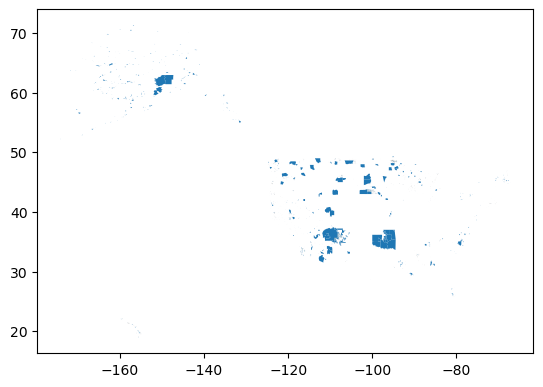

In [4]:
tribal.plot()

In [7]:
tsa.head()

,OBJECTID,TSAID,LARNAME,GISACRES,GlobalID,ShapeSTArea,ShapeSTLength,geometry
0,401,930,Osage,1.474540e+06,{38116449-2AD8-4473-B94D-D40AF9D4E511},0.601214,4.244631,"POLYGON ((-97.05711 36.59784, -97.05815 36.596..."
1,402,905,Cherokee,4.456430e+06,{3FC4E979-8DEE-4187-9668-500C38FCAF7C},1.807737,8.011650,"POLYGON ((-96.00148 36.165, -96.00122 36.16244..."
2,403,908,Creek,3.063060e+06,{9CED682D-74C8-49EB-AA92-0E16283B80ED},1.233810,5.929305,"POLYGON ((-96.62371 35.40088, -96.62371 35.400..."
3,404,923,Seneca-Cayuga,5.328840e+04,{19E66CCE-E08A-4F93-B4F5-543B9555E438},0.021745,0.831197,"POLYGON ((-94.8228 36.62649, -94.82279 36.6252..."
4,405,921,Eastern Shawnee,1.326690e+04,{D962A2C8-D39C-47E8-B875-D1A2B587751B},0.005425,0.424245,"POLYGON ((-94.76574 36.8717, -94.76589 36.8712..."


In [1]:
tsa.shape

NameError: name 'tsa' is not defined

In [9]:
villages.head()

,OBJECTID,TOfNme,TOfAltNme,Latitude,Longitude,TOfType,geometry
0,1,Agdaagux Tribe of King Cove,Agdaagux,55.041162,-162.299220,Tribal Headquarters,POINT (-162.29922 55.04116)
1,2,Akiachak Native Community,Akiachak,60.899674,-161.412235,Tribal Headquarters,POINT (-161.41224 60.89967)
2,3,Akiak Native Community,Akiak,60.907799,-161.221789,Tribal Headquarters,POINT (-161.22179 60.9078)
3,4,Alatna Village,Alatna,66.556521,-152.705569,Tribal Headquarters,POINT (-152.70557 66.55652)
4,5,Algaaciq Native Village (St. Mary's),Algaaciq,62.051731,-163.173524,Tribal Headquarters,POINT (-163.17352 62.05173)
